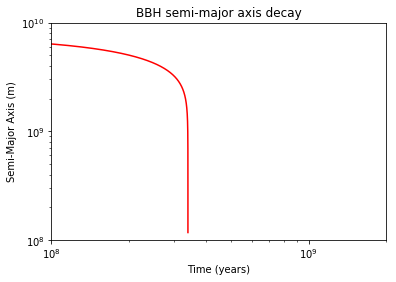

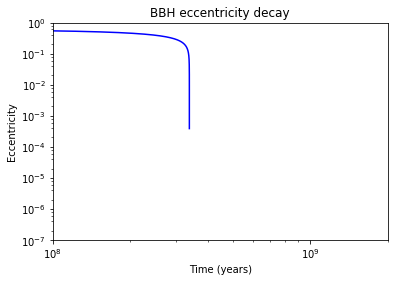

In [5]:
# This program solves the coupled set of ODEs given by equations 5.6 & 5.7 in Peters (1964)
# BBH_eccentricity: program that calculates the eccentricity evolution of a
# binary black hole system using eqns 5.6 & 5.7 from Peters (1964).

# Note: all constants & masses are in CGS units

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------
# Constants:

G = 6.674e-8           # Gravitational constant (cm^3/g/s)
c = 2.998e10           # speed of light (cm/s)
Msun = 1.98e33         # solar mass (g)
AU = 1.496e13          # Astronomical Unit (cm)
day = 60*60*24         # 1 day (s)
year = 365*day

# Binary attributes:

m1 = 9.1*Msun            # mass of primary BH
m2 = 8.2*Msun            # mass of secondary BH
Rs1 = (2*G*m1)/(c**2)  # Schwarzchild radius of primary BH
Rs2 = (2*G*m2)/(c**2)  # Schwarzchild radius of secondary BH
ei = 0.6;              # intial binary eccentricity
P = 1.0*day
ai = (P**2*G*(m1+m2)/(4*np.pi**2))**(1/3); # initial semi-major axis

dt = 0.1*day*year
time = [0]
i = 1

# Coupled ODEs:
aa = [ai/100]
ee = [ei]

a_old = ai
e_old = ei


while (a_old >= 0):
    i = i + 1
    dadt = -(64/5) * (G**3*m1*m2*(m1+m2))/(c**5*a_old**3*(1-e_old**2)**(7/2)) * (1+(73/24)*e_old**2+(37/96)*e_old**4)
    dedt = -(304/15) * e_old * (G**3*m1*m2*(m1+m2))/(c**5*a_old**4*(1-e_old**2)**(5/2)) * (1+(121/304)*e_old**2)
        
    a_new = a_old + dt*dadt
    e_new = e_old + dt*dedt
    
    aa = aa + [a_new/100]
    ee = ee + [e_new]
    
    time = time + [i*dt]
    
    a_old = a_new
    e_old = e_new
        
time_year = [x / year for x in time]

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.loglog(time_year,aa,color='red')
plt.title('BBH semi-major axis decay')
plt.xlabel('Time (years)')
plt.ylabel(r'Semi-Major Axis (m)')
plt.xlim(1e8,2e9)
plt.ylim(1e8,1e10)
plt.show()

f2 = plt.figure()
ax2 = f2.add_subplot(111)
ax2.loglog(time_year,ee,color='blue')
plt.title('BBH eccentricity decay')
plt.xlabel('Time (years)')
plt.ylabel(r'Eccentricity')
plt.xlim(1e8,2e9)
plt.ylim(1e-7,1.0)
plt.show()